**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    n_neighbors = 10
    algorithm = 'brute'
    metric = 'euclidean'
    xTrain = np.array([])
    yTrain = np.array([])
    
    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric

    def fit(self, X, y):
        self.xTrain = X
        self.yTrain = y

    def predict(self, X):
        if self.algorithm == 'brute':
            mid = self.yTrain[np.argpartition(scipy.spatial.distance.cdist(self.xTrain, X, metric=self.metric), \
                                self.n_neighbors, axis=0)[:self.n_neighbors]].transpose()
            yAns = np.ndarray((0,), dtype=int)
            for x in mid:
                yAns = np.append(yAns, np.argmax(np.bincount(x)))
            return yAns
        else:
            yAns = np.ndarray((0,), dtype=int)
            for x in X:
                tmp = np.append(np.ravel(self.xTrain), x).reshape((-1, self.xTrain.shape[1]))
                yAns = np.append(yAns, np.argmax(np.bincount(self.yTrain[KDTree(tmp[:-1], \
                                metric=self.metric).query(tmp[-1:], k=self.n_neighbors)[1]].ravel())))
            return yAns

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)

assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

CPU times: user 623 µs, sys: 280 µs, total: 903 µs
Wall time: 785 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [9]:
%time my_clf.fit(X_train, y_train)

CPU times: user 6 µs, sys: 3 µs, total: 9 µs
Wall time: 10.3 µs


In [10]:
%time clf.predict(X_test)

CPU times: user 5.33 ms, sys: 0 ns, total: 5.33 ms
Wall time: 5.77 ms


array([0, 0, 1, 1, 2, 1, 0, 2, 2, 2, 2, 1, 0, 0, 1])

In [11]:
%time my_clf.predict(X_test)

CPU times: user 1.25 ms, sys: 546 µs, total: 1.79 ms
Wall time: 1.11 ms


array([0, 0, 1, 1, 2, 1, 0, 2, 2, 2, 2, 1, 0, 0, 1])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

CPU times: user 1.55 ms, sys: 666 µs, total: 2.21 ms
Wall time: 9.07 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [15]:
%time my_clf.fit(X_train, y_train)

CPU times: user 9 µs, sys: 4 µs, total: 13 µs
Wall time: 18.6 µs


In [19]:
%time clf.predict(X_test)

CPU times: user 31 µs, sys: 4.59 ms, total: 4.62 ms
Wall time: 5.91 ms


array([1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 0, 2, 0, 2])

In [21]:
%time my_clf.predict(X_test)

CPU times: user 6.02 ms, sys: 731 µs, total: 6.75 ms
Wall time: 5.6 ms


array([1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 0, 2, 0, 2])

In [22]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)

assert abs(accuracy_score(y_test, my_clf_pred) - accuracy_score(y_test, sklearn_pred)) < 0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [23]:
newsgroups = fetch_20newsgroups(subset='train', remove=['headers','footers', 'quotes'])

In [24]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [25]:
vectorizer = CountVectorizer(max_features=1300, max_df=0.065)
vectData = vectorizer.fit_transform(data).toarray()

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [26]:
kf = KFold(n_splits=3)
for xTrainIndexes, xTestIndexes in kf.split(vectData, target):
    xTrain, xTest = vectData[xTrainIndexes], vectData[xTestIndexes]
    yTrain, yTest = target[xTrainIndexes], target[xTestIndexes]

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [ ]:
def kFoldAccuracy(vectData, splitsCount=3, neighborsCount=3, metric='euclidean'):
    totalAccuracy = 0.0
    kf = KFold(n_splits=splitsCount)
    for xTrain, xTest in kf.split(vectData, target):
        cls = MyKNeighborsClassifier(n_neighbors=neighborsCount, algorithm='brute', metric=metric)
        cls.fit(vectData[xTrain], target[xTrain])
        totalAccuracy += accuracy_score(target[xTest], cls.predict(vectData[xTest]))
    return totalAccuracy / splitsCount


def bestKnn(vectData, maxNeighbors=10, metric='euclidean'):
    maxValue = 0
    bestNeighbors = 0
    allResult = np.ndarray((0, ))
    for i in range(1, maxNeighbors + 1):
        cur = kFoldAccuracy(vectData, neighborsCount=i, metric=metric)
        if cur > maxValue:
            maxValue = cur
            bestNeighbors = i
        allResult = np.append(allResult, cur)
    return maxValue, bestNeighbors, allResult


ans = bestKnn(vectData, maxNeighbors=20)
print(ans[0], ans[1])
plt.plot(np.arange(1, 21), ans[2])

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

0.4885981498775937 20


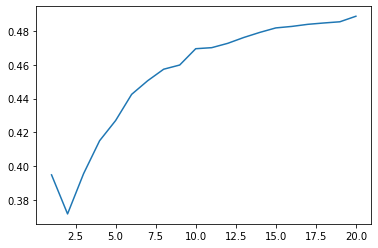

In [79]:
ans = bestKnn(vectData, maxNeighbors=20, metric='cosine') # 1
print(ans[0], ans[1])
plt.plot(np.arange(1, 21), ans[2])

0.5121094464377594 20


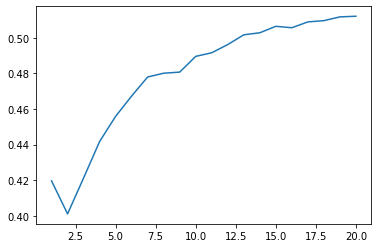

In [80]:
vectorizer = TfidfVectorizer(max_features=1300,  max_df=0.065) # 2
vectData1 = vectorizer.fit_transform(data).toarray()

ans = bestKnn(vectData1, maxNeighbors=20, metric='cosine')
print(ans[0], ans[1])
plt.plot(np.arange(1, 21), ans[2])

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [81]:
newsgroups = fetch_20newsgroups(subset='test', remove=['headers','footers', 'quotes'])
data_test = newsgroups['data']
target_test = newsgroups['target']

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [ ]:
common_vocab = vectorizer.get_feature_names()
vectorizer = TfidfVectorizer(max_features=1300, vocabulary=common_vocab, max_df=0.065) # 2
vectData2 = vectorizer.fit_transform(data_test).toarray()

my_cls = MyKNeighborsClassifier(20, algorithm='brute', metric='cosine')
my_cls.fit(vectData1, target)
print(accuracy_score(my_cls.predict(vectData2), target_test))